In [75]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Model
import os

In [76]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [77]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer('fc2').output)

In [79]:
feat_extractor.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [80]:
import glob
import random

images = glob.glob('./dataset/*.jpg')

In [81]:
images

['./dataset/Ugly Design:173.jpg',
 './dataset/Ugly Design:167.jpg',
 './dataset/Ugly Design:38.jpg',
 './dataset/Ugly Design:10.jpg',
 './dataset/Ugly Design:198.jpg',
 './dataset/Ugly Design:205.jpg',
 './dataset/Ugly Design:211.jpg',
 './dataset/Ugly Design:239.jpg',
 './dataset/Ugly Design:238.jpg',
 './dataset/Ugly Design:210.jpg',
 './dataset/Ugly Design:204.jpg',
 './dataset/Ugly Design:199.jpg',
 './dataset/Ugly Design:11.jpg',
 './dataset/Ugly Design:39.jpg',
 './dataset/Ugly Design:166.jpg',
 './dataset/Ugly Design:172.jpg',
 './dataset/Ugly Design:164.jpg',
 './dataset/Ugly Design:170.jpg',
 './dataset/Ugly Design:158.jpg',
 './dataset/Ugly Design:13.jpg',
 './dataset/Ugly Design:212.jpg',
 './dataset/Ugly Design:206.jpg',
 './dataset/Ugly Design:207.jpg',
 './dataset/Ugly Design:213.jpg',
 './dataset/Ugly Design:12.jpg',
 './dataset/Ugly Design:159.jpg',
 './dataset/Ugly Design:171.jpg',
 './dataset/Ugly Design:165.jpg',
 './dataset/Ugly Design:16.jpg',
 './dataset/Ugly Desi

In [82]:
random.shuffle(images)
images = images[:300]

In [54]:
images

['./dataset/Ugly Design 53.jpg',
 './dataset/Ugly Design 157.jpg',
 './dataset/Ugly Design 77.jpg',
 './dataset/Ugly Design 34.jpg',
 './dataset/Ugly Design 244.jpg',
 './dataset/Ugly Design 227.jpg',
 './dataset/Ugly Design 208.jpg',
 './dataset/Ugly Design 295.jpg',
 './dataset/Ugly Design 70.jpg',
 './dataset/Ugly Design 95.jpg',
 './dataset/Ugly Design 51.jpg',
 './dataset/Ugly Design 103.jpg',
 './dataset/Ugly Design 162.jpg',
 './dataset/Ugly Design 176.jpg',
 './dataset/Ugly Design 113.jpg',
 './dataset/Ugly Design 170.jpg',
 './dataset/Ugly Design 198.jpg',
 './dataset/Ugly Design 123.jpg',
 './dataset/Ugly Design 276.jpg',
 './dataset/Ugly Design 10.jpg',
 './dataset/Ugly Design 271.jpg',
 './dataset/Ugly Design 138.jpg',
 './dataset/Ugly Design 301.jpg',
 './dataset/Ugly Design 66.jpg',
 './dataset/Ugly Design 262.jpg',
 './dataset/Ugly Design 202.jpg',
 './dataset/Ugly Design 163.jpg',
 './dataset/Ugly Design 199.jpg',
 './dataset/Ugly Design 122.jpg',
 './dataset/Ugly Desig

In [84]:
import numpy as np

features = []

for i, image_path in enumerate(images):
#     print(image_path)
    if i % 10 == 0:
        print('we just analyzed' + str(i) + ' out of ' + str(len(images)))
        
    img = image.load_img(image_path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feat = feat_extractor.predict(x)[0]
    features.append(feat)


we just analyzed0 out of 300
we just analyzed10 out of 300
we just analyzed20 out of 300
we just analyzed30 out of 300
we just analyzed40 out of 300
we just analyzed50 out of 300
we just analyzed60 out of 300
we just analyzed70 out of 300
we just analyzed80 out of 300
we just analyzed90 out of 300
we just analyzed100 out of 300
we just analyzed110 out of 300
we just analyzed120 out of 300
we just analyzed130 out of 300
we just analyzed140 out of 300
we just analyzed150 out of 300
we just analyzed160 out of 300
we just analyzed170 out of 300
we just analyzed180 out of 300
we just analyzed190 out of 300
we just analyzed200 out of 300
we just analyzed210 out of 300
we just analyzed220 out of 300
we just analyzed230 out of 300
we just analyzed240 out of 300
we just analyzed250 out of 300
we just analyzed260 out of 300
we just analyzed270 out of 300
we just analyzed280 out of 300
we just analyzed290 out of 300


In [85]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(features)

In [88]:
from sklearn.cluster import MiniBatchKMeans

sum_squared = []

K = range(1, 20)

for i in K:
    print('Calculating ' + str(i))
    kmeans = MiniBatchKMeans(n_clusters=i)
    kmeans.fit(scaled)
    sum_squared.append(kmeans.inertia_)

Calculating 1
Calculating 2
Calculating 3
Calculating 4
Calculating 5
Calculating 6
Calculating 7
Calculating 8
Calculating 9
Calculating 10
Calculating 11
Calculating 12
Calculating 13
Calculating 14
Calculating 15
Calculating 16
Calculating 17
Calculating 18
Calculating 19


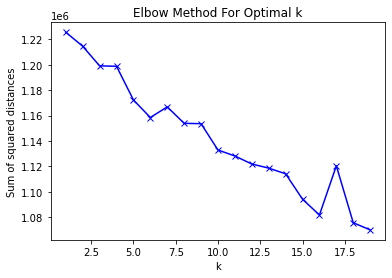

In [89]:
import matplotlib.pyplot as plt

plt.plot(K, sum_squared, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [90]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)
clusters = kmeans.fit_predict(scaled)

In [91]:

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5, metric='cosine').fit(scaled)
_, closest = neighbors.kneighbors(kmeans.cluster_centers_)

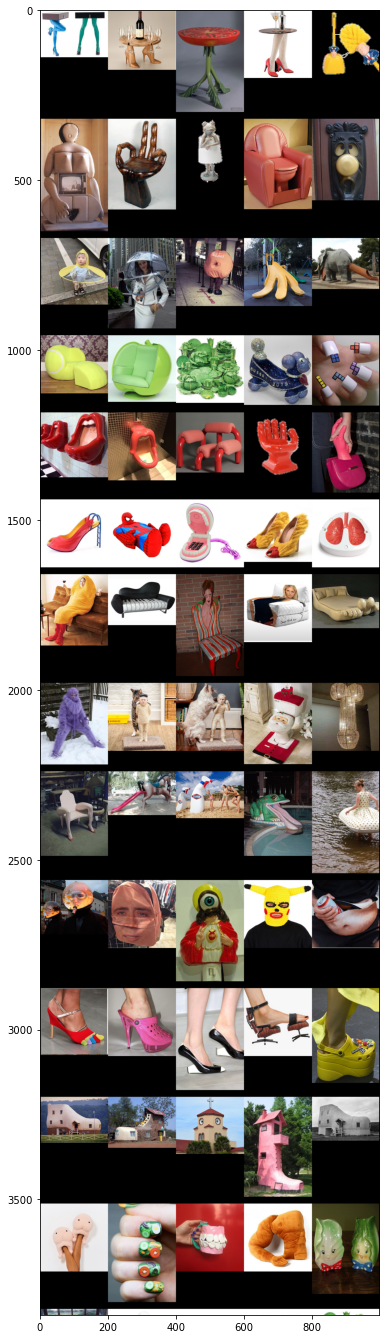

In [92]:

from PIL import Image

img_width = 200

grid_image = Image.new('RGB', (5 * img_width, len(closest) * 240), (0, 0, 0, 255))

max_height = 0
for cluster_row in closest:
    max_height_temp = 0
    xpos = 0
    for col_num in cluster_row:
        img = Image.open(images[col_num])
        img_ar = img.width / img.height
        img = img.resize((img_width, int(img_width / img_ar)), Image.ANTIALIAS)
        max_height_temp = max(max_height_temp, img.height)
        grid_image.paste(img, (xpos, max_height))
        xpos = xpos + img.width
    max_height = max_height + max_height_temp + 20 # adding 20 pixel margin

plt.figure(figsize = (32,24))
plt.imshow(grid_image)

In [93]:
import umap

embedding = umap.UMAP().fit_transform(scaled)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(embedding)
embedding_scaled = scaler.transform(embedding)

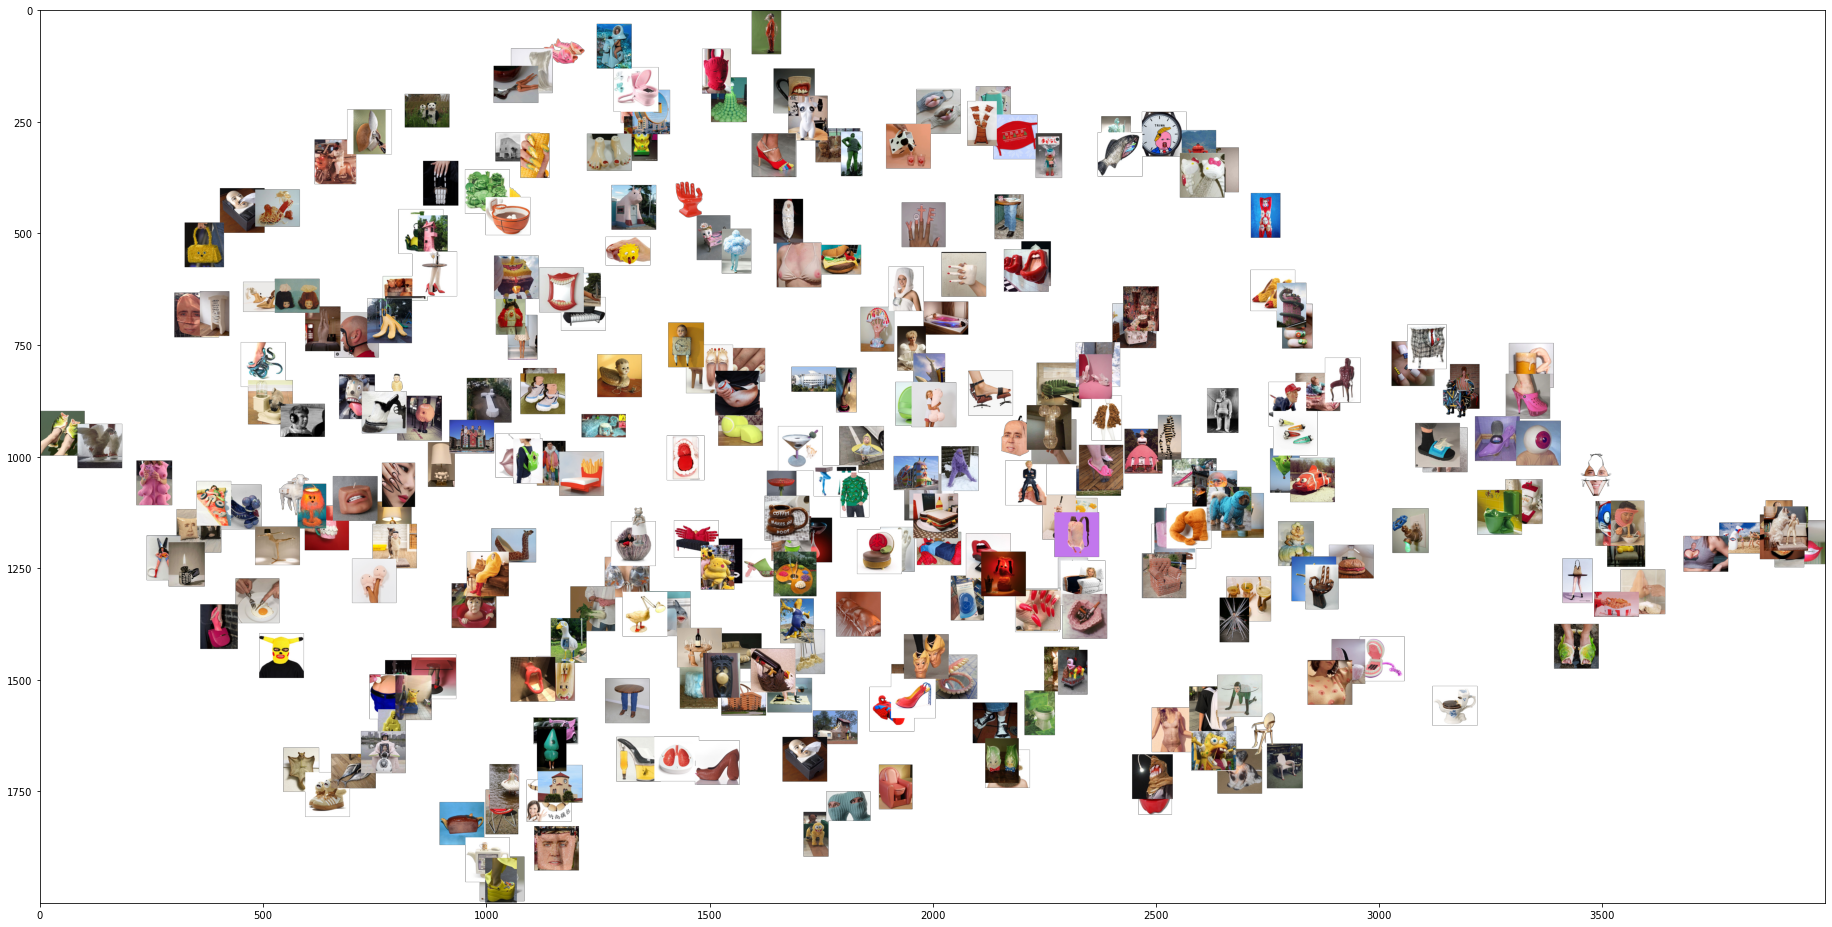

In [67]:
width = 4000
height = 2000
max_dim = 100

full_image = Image.new('RGBA', (width, height), (0, 0, 0, 0))
for img, pos in zip(images, embedding_scaled):
    x = pos[0]
    y = pos[1]
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (32,24))
plt.imshow(full_image)



In [56]:
# save the image
full_image.save("cluster.png")


In [95]:

import rasterfairy

nx = 20
ny = 15

grid_assignment = rasterfairy.transformPointCloud2D(embedding,target=(nx, ny))

<PIL.Image.Image image mode=RGB size=2000x1500 at 0x7FB7AD3EE700>


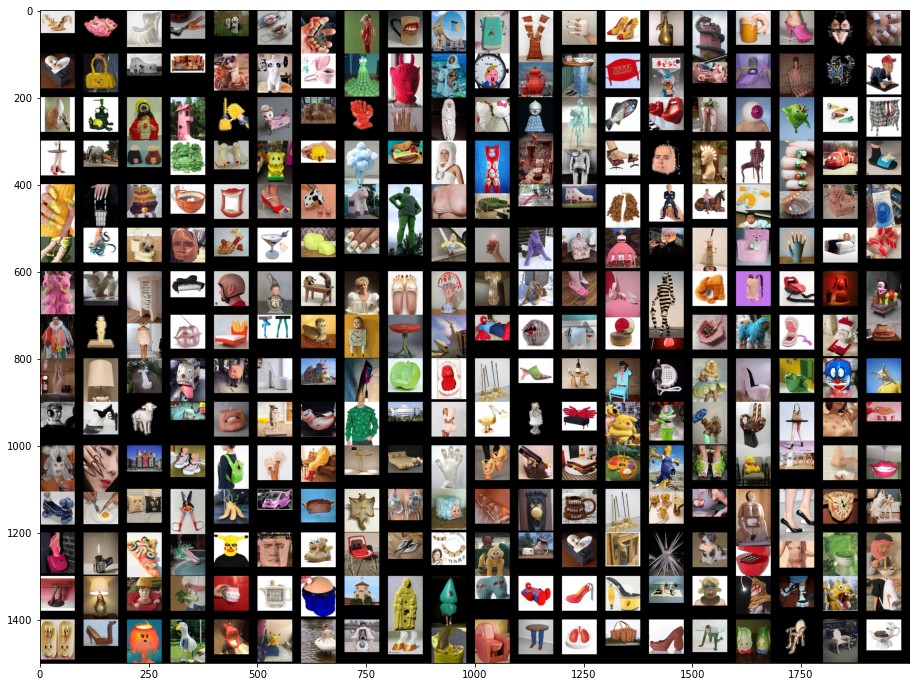

In [73]:

tile_width = 100
tile_height = 100

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = tile_width / tile_height

grid_image = Image.new('RGB', (full_width, full_height), (0, 0, 0, 255))

print(grid_image)

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = tile.width / tile.height
    tile = tile.resize((int(0.8 * tile_width), int(0.8 * tile_height / tile_ar)), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

plt.figure(figsize = (16,12))
plt.imshow(grid_image)

In [61]:
grid_image.save("grid.jpg")

In [96]:
lookup = []

for image, grid_pos, cluster_pos in zip(images, grid_assignment[0], embedding_scaled):
    lookup.append({
        "filename": image.replace('./', ''),
        "grid_pos": grid_pos.tolist(),
        "cluster_pos": cluster_pos.tolist()
    })

In [97]:

import json

with open('image_umap_position.json', 'w') as outfile:
    json.dump(lookup, outfile)